# Exploration Exercises

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Modules
import env
import wrangle_zillow as w

pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = w.wrangle_zillow()

In [3]:
df.shape

(70110, 19)

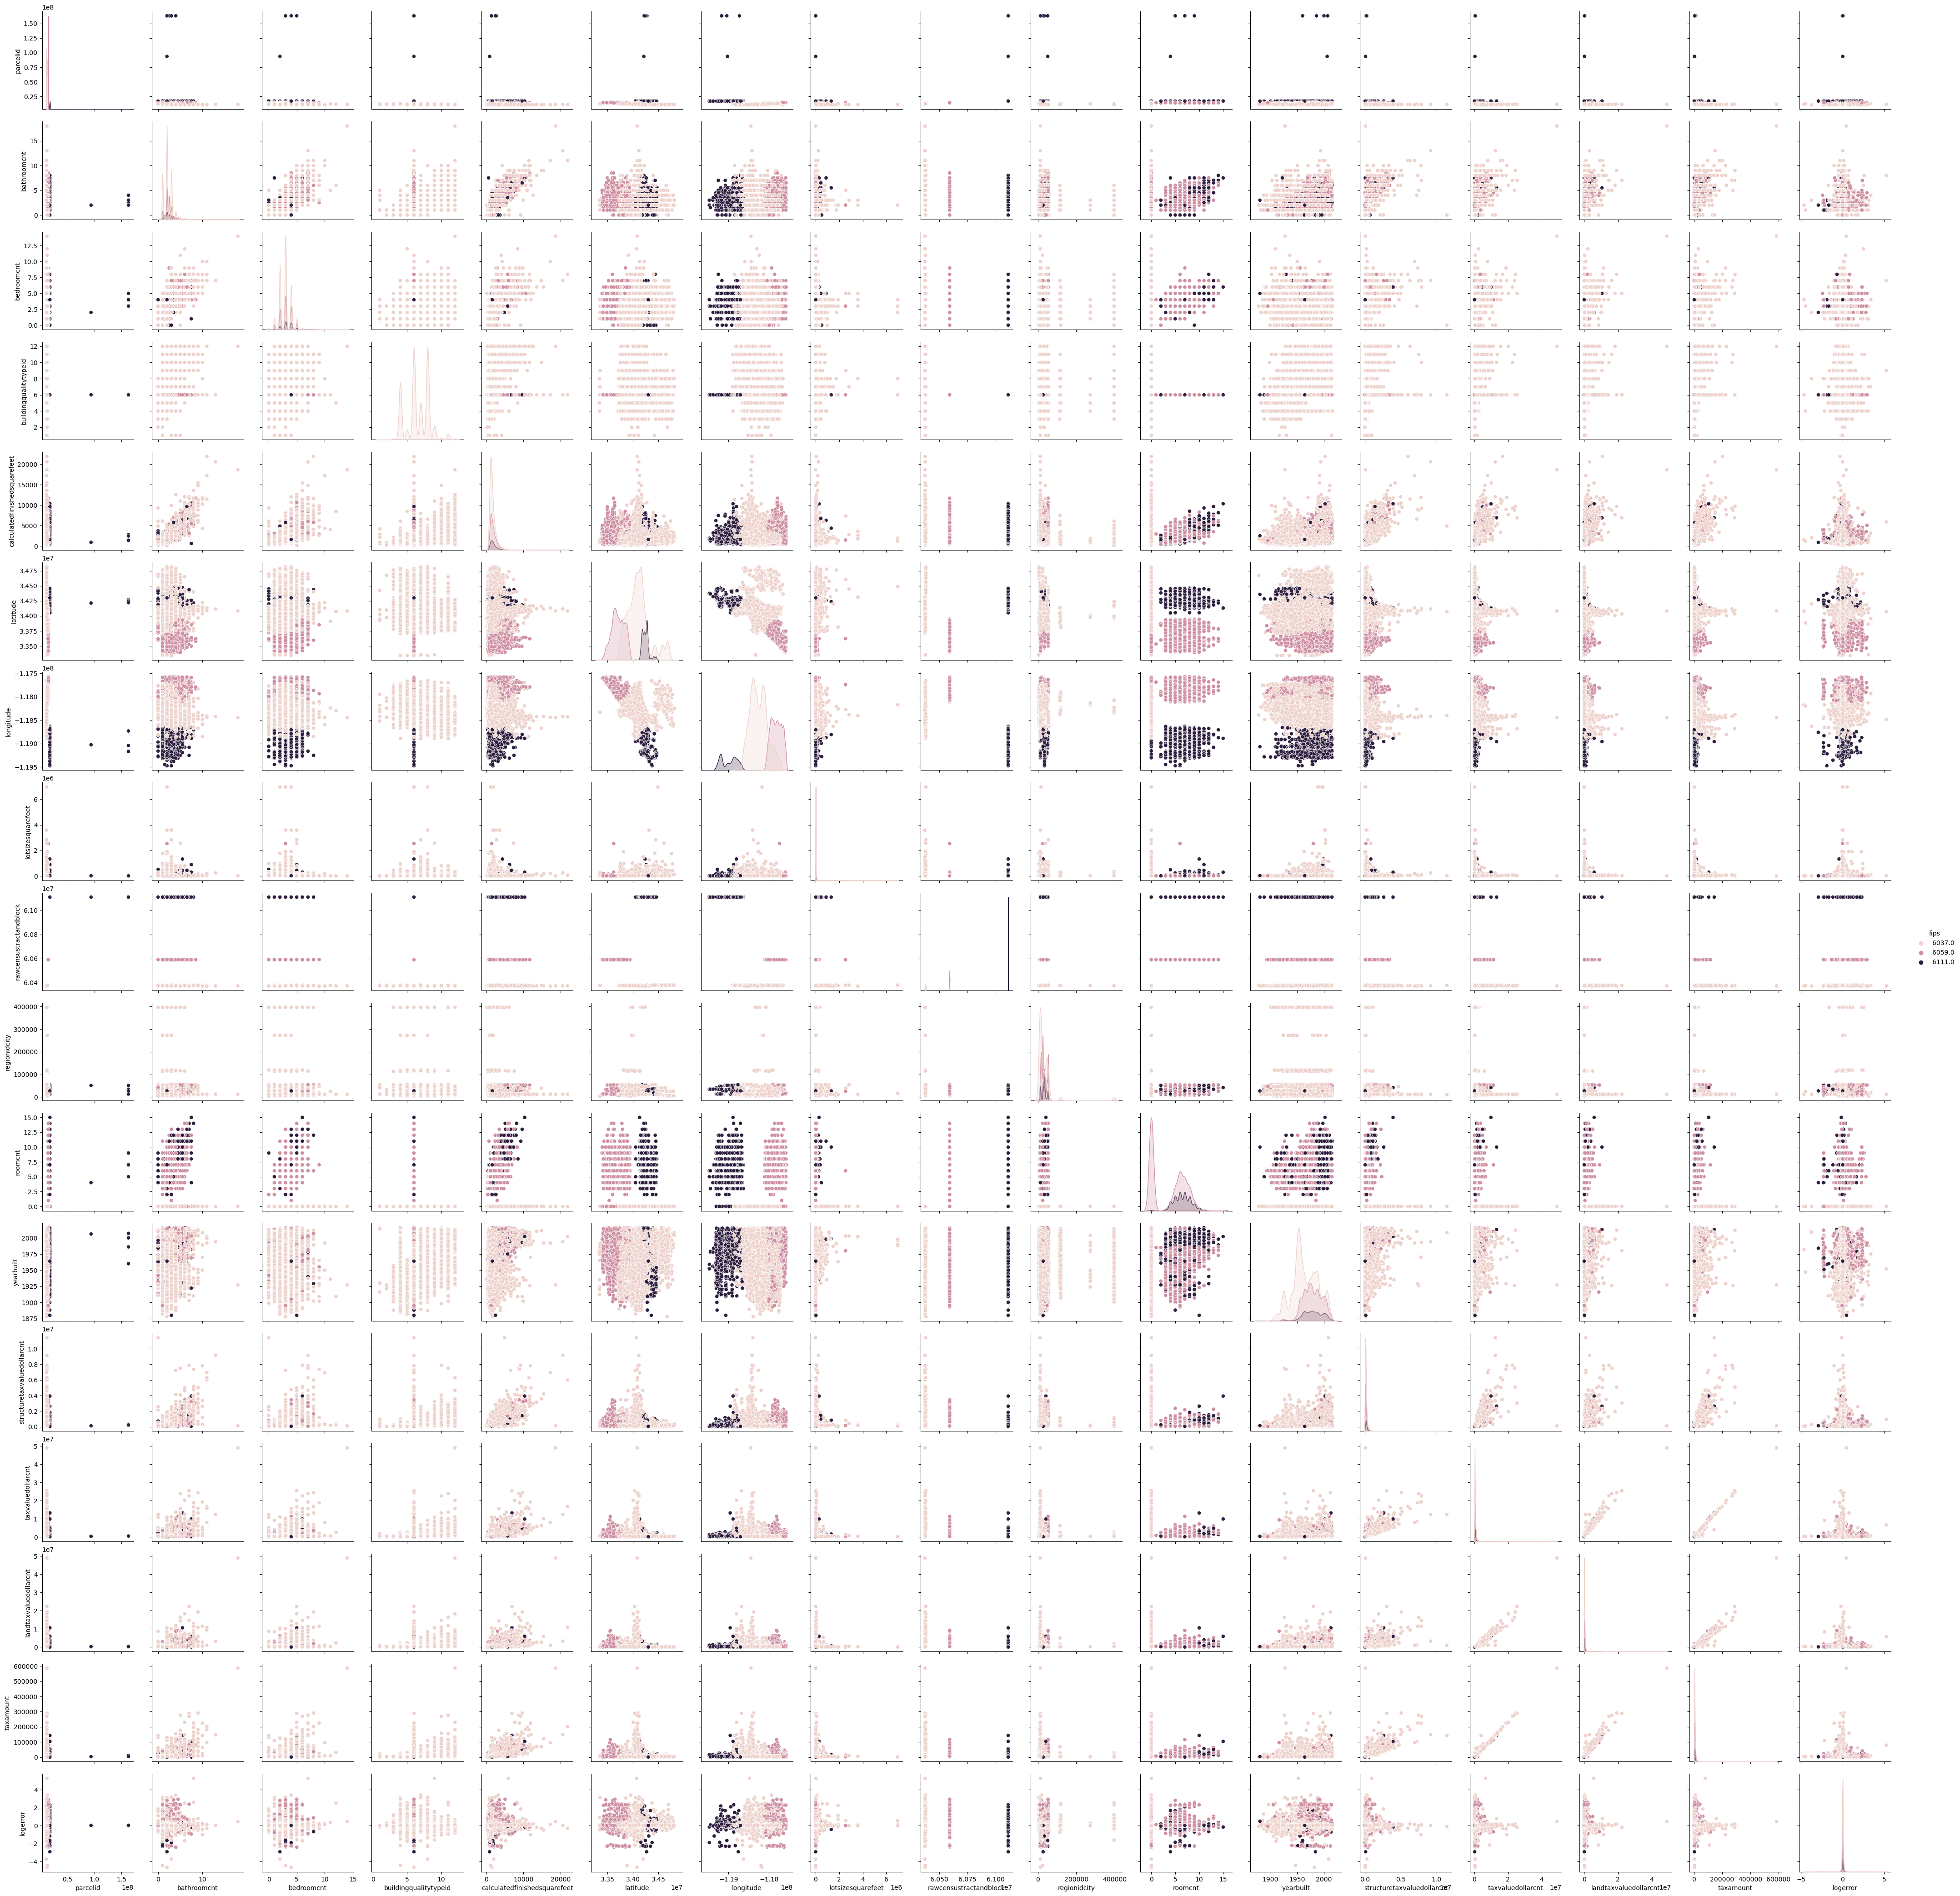

In [7]:
sns.pairplot(df, hue='fips')

In [8]:
def split_zillow(df):
    '''This function splits the clean zillow data stratified on value'''
    #train/validate/test split
    
    train_validate, test = train_test_split(df, test_size = .2, random_state=311)

    train, validate = train_test_split(train_validate, test_size = .25, random_state=311)

    return train, validate, test

In [9]:
train, validate, test = split_zillow(df)

In [14]:
train_viz = train.sample(800)

### 1. Is logerror significantly different for each county?

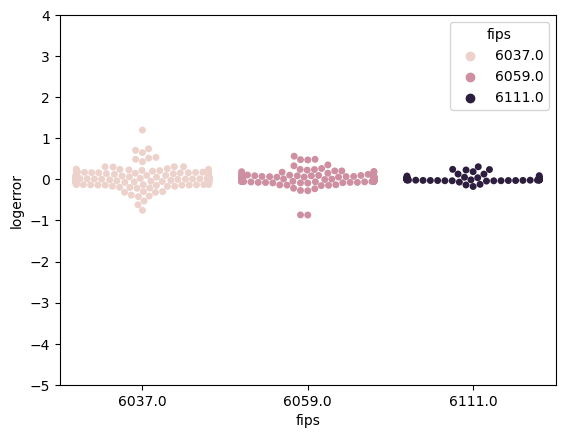

In [15]:
sns.swarmplot(train_viz, x='fips', y='logerror', hue='fips')
plt.yticks(np.arange(-5, 5, step=1))
plt.show()

In [16]:
fips_mean = train.groupby('fips')['logerror'].mean()

In [17]:
fips_mean

fips
6,037.00                   0.01
6,059.00                   0.02
6,111.00                   0.01
Name: logerror, dtype: float64

In [19]:
los_angeles_logerror = train[train.fips == 6037.00].logerror
orange_logerror = train[train.fips == 6059.00].logerror
ventura_logerror = train[train.fips == 6111.00].logerror

<Axes: >

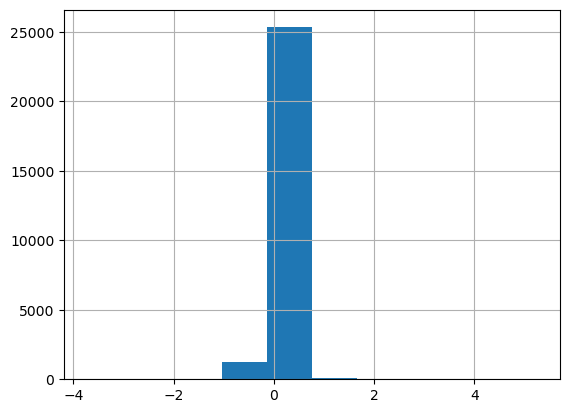

In [20]:
los_angeles_logerror.hist()

<Axes: >

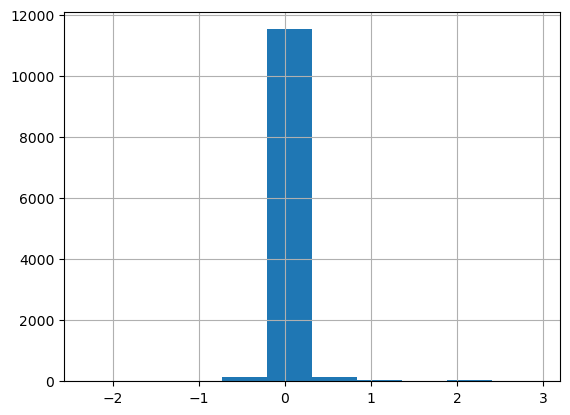

In [21]:
orange_logerror.hist()

<Axes: >

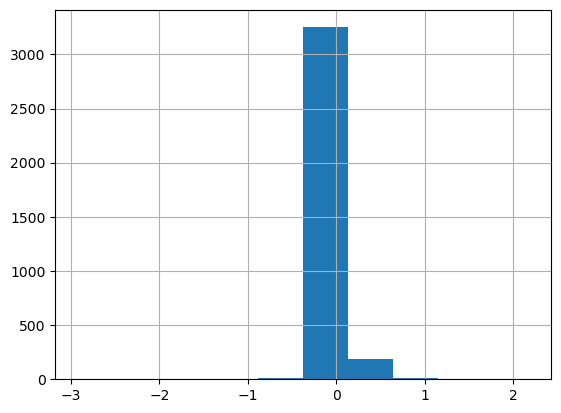

In [22]:
ventura_logerror.hist()

In [24]:
print(los_angeles_logerror.var())
print(orange_logerror.var())
print(ventura_logerror.var())


0.025108405064495565
0.031224455025587045
0.026678346497863506


$H_0$: population means of the logerror for the three counties are all equal.

$H_a$: population means of the logerror for the three counties are NOT all equal.

In [25]:
f, p = stats.f_oneway(los_angeles_logerror, orange_logerror, ventura_logerror)
f, p

(7.7616522170970095, 0.00042636261930661327)

### 2.  yearbuilt by fips and logerror

In [30]:
los_angeles_yearbuilt = train[train.fips == 6037.00].yearbuilt
orange_yearbuilt = train[train.fips == 6059.00].yearbuilt
ventura_yearbuilt = train[train.fips == 6111.00].yearbuilt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


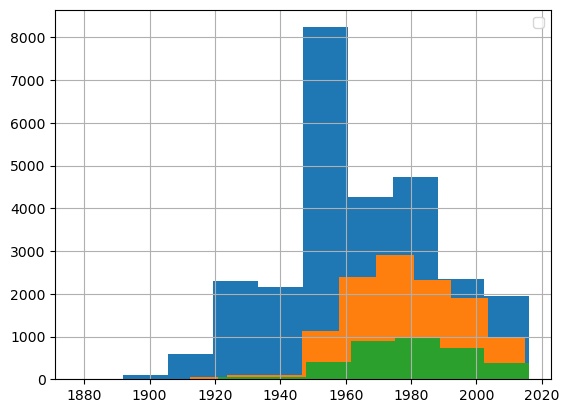

In [35]:
los_angeles_yearbuilt.hist()
orange_yearbuilt.hist()
ventura_yearbuilt.hist()
plt.legend()

<Axes: >

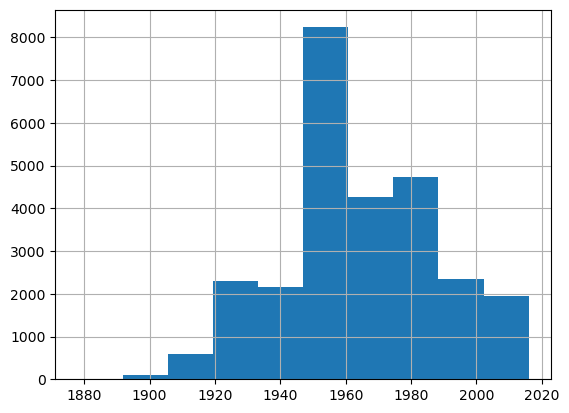

In [29]:
los_angeles_yearbuilt.hist()

<Axes: >

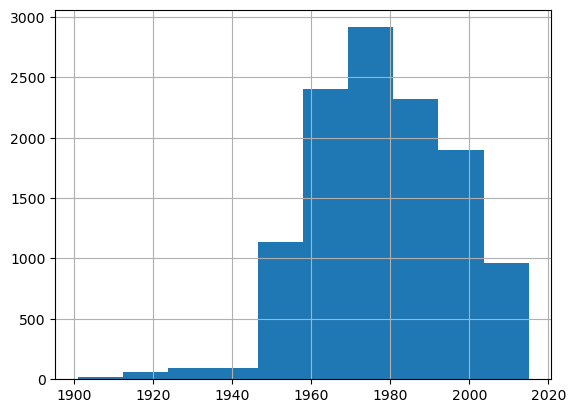

In [31]:
orange_yearbuilt.hist()

<Axes: >

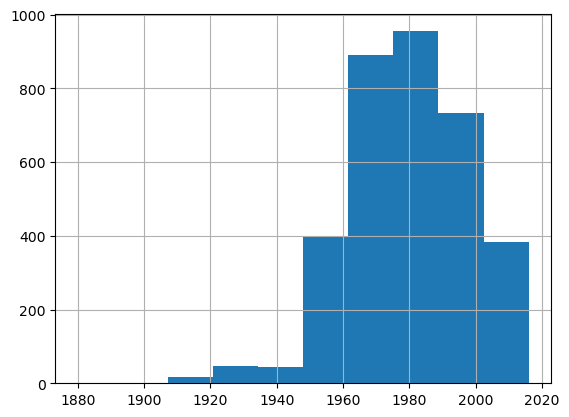

In [32]:
ventura_yearbuilt.hist()

* split the dataset into counties with all of the features
* scatterplots to see if we see any clusters
* try binning certain features to see if we can narrow down these groups



* place logerror into bins? rate them base on the score?